In [1]:
import numpy as np
from pyomo.opt import SolverFactory
# import gurobipy

import pandas as pd
import scipy.optimize as so

import matplotlib.pyplot as plt

import pyomo.environ as pyo

import energym

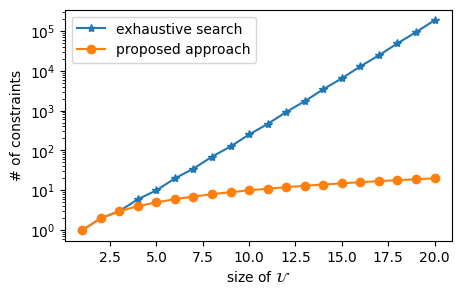

In [28]:
from scipy.special import comb, perm
import matplotlib.pyplot as plt
orig_list = []
proposed_list = []
x_label = range(1,21)
for size_mu in x_label:

   # _ans = sum(comb(size_mu, i) for i in range(int(size_mu/2)))
    _ans = comb(size_mu, int(size_mu/2))
    orig_list.append(_ans)
    proposed_list.append(size_mu)

plt.figure(figsize = (5,3))        
plt.plot(x_label, orig_list, "*-", label = "exhaustive search")
plt.plot(x_label, proposed_list, "o-", label = "proposed approach")
plt.xlabel("size of $\mathcal{U}$")#("$|\mathcal{U}|$")
plt.ylabel("# of constraints")
plt.yscale("log")
plt.legend()
# plt.savefig("compare.pdf", bbox_inches = "tight")




In [2]:
weather = "CH_VD_Lausanne"
env = energym.make("SimpleHouseRad-v0", weather=weather, simulation_days=6)

outputs = env.get_output()
outputs["temRoo.T"]

# for generating training data
steps = 288*5
out_list = []
outputs = env.get_output()
controls = []
hour = 0
hours = []
for i in range(steps):
    control = {}
    control['u'] = [0.5*(np.sin(i * 0.1 + np.random.rand()) + 1)]
    controls +=[ {p:control[p][0] for p in control} ] # each element is a dictionary
    outputs = env.step(control)
    _,hour,_,_ = env.get_date()
    hours.append(hour)
    out_list.append(outputs)
    
    
out_df = pd.DataFrame(out_list)
in_df = pd.DataFrame(controls)

the initial variables are {'u': 0.0}
[OK] %s
[WARNING] %s


In [3]:
out_df

TOut.T  heaPum.COP  heaPum.COPCar     heaPum.P  heaPum.QCon_flow  \
0     273.073611    3.790602       7.977257  3202.301973      12138.652966   
1     273.011111    3.672480       7.728671  4487.253887      16479.349938   
2     272.962500    3.879418       8.164169  3124.901119      12122.798660   
3     272.927778    3.677390       7.739005  4778.368092      17571.925212   
4     272.906944    3.829031       8.058130  3535.418908      13537.228333   
...          ...         ...            ...          ...               ...   
1435  274.150000    5.143689      10.824804  1592.708742       8192.398165   
1436  274.150000    4.717476       9.927847  2567.645417      12112.806024   
1437  274.150000    5.115034      10.764500   928.119407       4747.362037   
1438  274.150000    4.785217      10.070407  2149.081925      10283.823668   
1439  274.150000    4.996794      10.515667  1245.092953       6221.473354   

      heaPum.QEva_flow  heaPum.TConAct  heaPum.TEvaAct  preHea.Q_flow  \
0         -8936.350994      320.177409      280.041130            0.0   
1        -11992.096051      320.397205      278.941537            0.0   
2         -8997.897541      319.081715      279.998531            0.0   
3        -12793.557120      320.004626      278.655042            0.0   
4        -10001.809425      319.263172      279.643162            0.0   
...                ...             ...             ...            ...   
1435      -6599.689423      309.413368      280.829631            0.0   
1436      -9545.160608      311.126722      279.787932            0.0   
1437      -3819.242630      310.671791      281.811019            0.0   
1438      -8134.741743      311.190672      280.289173            0.0   
1439      -4976.380401      310.977662      281.404868            0.0   

        rad.Q_flow  ...  sunRad.y    temRet.T    temRoo.T    temSup.T  \
0    -16397.375601  ...       0.0  314.032806  293.370215  319.223892   
1    -16310.582953  ...       0.0  314.687824  293.551246  319.078860   
2    -15056.920549  ...       0.0  313.288896  293.706710  318.116977   
3    -15659.820857  ...       0.0  314.276360  293.853153  318.596832   
4    -14969.365850  ...       0.0  313.525205  293.993168  318.182322   
...            ...  ...       ...         ...         ...         ...   
1435  -6172.960212  ...       0.0  302.855832  294.561776  308.751259   
1436  -7657.449779  ...       0.0  304.868762  294.467788  310.148129   
1437  -6932.355224  ...       0.0  303.881212  294.383027  310.300177   
1438  -7870.061843  ...       0.0  304.898410  294.305846  310.361132   
1439  -7466.233095  ...       0.0  304.344508  294.234747  310.484439   

      weaBus.HDifHor  weaBus.HDirNor  weaBus.HGloHor  weaBus.HHorIR  \
0                0.0             0.0             0.0     285.218557   
1                0.0             0.0             0.0     285.378086   
2                0.0             0.0             0.0     285.484375   
3                0.0             0.0             0.0     285.543210   
4                0.0             0.0             0.0     285.560378   
...              ...             ...             ...            ...   
1435             0.0             0.0             0.0     262.000000   
1436             0.0             0.0             0.0     262.000000   
1437             0.0             0.0             0.0     262.000000   
1438             0.0             0.0             0.0     262.000000   
1439             0.0             0.0             0.0     262.000000   

               y      time  
0     293.370215     300.0  
1     293.551246     600.0  
2     293.706710     900.0  
3     293.853153    1200.0  
4     293.993168    1500.0  
...          ...       ...  
1435  294.561776  430800.0  
1436  294.467788  431100.0  
1437  294.383027  431400.0  
1438  294.305846  431700.0  
1439  294.234747  432000.0  

[1440 rows x 22 columns]

In [4]:
Inputs_index = ["TOut.T", "rad.Q_flow", "sunRad.y"]
Inputs = out_df[Inputs_index].values
Inputs

Outputs = out_df["y"].values

In [11]:
def fun_2R2C(x, inputs, output): ###### Ci: indoor temp, Cr: radiator temp; model radiator as a C, and no envelop
    
    Ci, Ce, Rie, Reo = x
    N = inputs.shape[0]
    Ns = int(24*12)
    seg_len = Ns
    
    st_ahu =  19.8*np.ones(N)#inputs[:,0]  ## supply temperature of ahu
    st_cv =  35*np.ones(N) #inputs[:,1]  ## supply temperature of central heating
    st_gkw =  16*np.ones(N) #inputs[:,2] ## supply temperatyre of cooling


#     st_ahu =  inputs[:,0]  ## supply temperature of ahu
#     st_cv =  inputs[:,1]  ## supply temperature of central heating
#     st_gkw =  inputs[:,2] ## supply temperatyre of cooling
    
    
    vav_ahu = inputs[:,3]/100
    vav_cv = inputs[:,4]/100
    vav_gkw = inputs[:,5]/100
    rt = inputs[:,6]
    
    people_emission = 0*100 ### 100w emission per person, assume 15 people
    
    to = 20*np.ones(N)
    pir = inputs[:,-2]
    time = inputs[:,-1]
    
    ms_ahu = 3600/3600 ### 3600 m^3/h
    C_air = 1210 ## specific heat capacity of air 1.21 J*m^3/K
    C_water = 4.18e6 ## specific heat capacity of water 4180 J*m^3/K
    ms_cv_gkw = 0.780/3600
    people_emission = 0*100 ### 100w emission per person, assume 15 people
    
    ti = np.zeros(N)
    tr = np.zeros(N)
    
    for s in range(int(N/Ns)):
        k = s*Ns
        ti[k] = Output[k]
        tr[k] = (1 + Rir/Rio)*ti[k] - to[k]*(Rir/Rio)
        for t in range(Ns-1):
            dt = time[k+t+1]
            ti[k+t+1] = ti[k+t] + dt/Ci*( (tr[k+t] - ti[k+t])/Rir + vav_ahu[k+t]*ms_ahu*C_air*(st_ahu[k+t] - ti[k+t])\
                                        + (to[k+t] - ti[k+t])/Rio + people_emission )
            
            tr[k+t+1] = tr[k+t] + dt/Cr*( (ti[k+t] - tr[k+t])/Rir + vav_cv[k+t]*ms_cv_gkw*C_water*(st_cv[k+t]-rt[k+t]) \
                                        + vav_gkw[k+t]*ms_cv_gkw*C_water*(st_gkw[k+t] - rt[k+t]) )
            
    return sum( (ti[t] - output[t])**2 for t in range(N))

array([[   273.07361111, -15637.92326826,      0.        ],
       [   273.01111111, -14816.38535398,      0.        ],
       [   272.9625    , -15355.60684177,      0.        ],
       ...,
       [   274.15      ,  -6801.7066191 ,      0.        ],
       [   274.15      ,  -7852.76035566,      0.        ],
       [   274.15      ,  -9104.93672639,      0.        ]])

In [ ]:
##################################################
###    solar power prediction
##################################################

def solar_predict(S_DNI, S_DHI, Ta):
    Am = 0
    theta_m = 28/360 * 2* np.pi
    As = 265/360*2*np.pi
    a_s = 30/360*2*np.pi
    lamb = -0.0038
    T_NOCT = 45
    Pr = 327
    
    Sm_DNI = S_DNI*(np.sin(theta_m) * np.cos(a_s) * np.cos(Am - As) + np.cos(theta_m) * np.sin(a_s))
    Sm_DHI = S_DHI*(1+ np.cos(theta_m))/2
    Sm = Sm_DHI + Sm_DNI 
    
    T_cell = Ta + Sm/800*(T_NOCT - 20)
    P_m = Pr*Sm/1000*(1 - lamb*(T_cell - 25))
    
    return P_m


##################################################
###  whether data generation
##################################################
S_DNI = out_df["weaBus.HDirNor"].values
S_DHI = out_df["weaBus.HDifHor"].values
T_out = out_df["TOut.T"].values

P_m = solar_predict(S_DNI, S_DHI, T_out)*2000/327 ## solar power is scaled to 500 w

plt.plot(P_m)    

In [ ]:
from more_itertools import chunked

T_base = 0

T_amb = np.array([sum(x)/len(x) for x in chunked(T_out,6)]) -273.25 + T_base - 5
Solar = np.array([sum(x)/len(x) for x in chunked(S_DHI,6)])
P_solar = np.array([sum(x)/len(x) for x in chunked(P_m,6)])

plt.figure()
plt.subplot(311)
plt.plot(T_amb)
plt.subplot(312)
plt.plot(Solar)
plt.subplot(313)
plt.plot(P_solar)

In [ ]:

# ############## 2 dimentional system ##################
# A = np.array([[1 - dt/(Ri*Ci), dt/(Ci*Ri)],
#              [dt/(Ce*Ri), 1 - dt/Ce*(1/Ri + 1/Ro)]])

# B = np.array([[dt/Ci],
#              [0]])

# I = np.eye(2)

# R = np.array([[0, dt*Ai/Ci],
#              [dt/(Ce*Ro), Ae*dt/Ce]])



############# 1 dimentional system #####################

dim = 1

A = np.array([[0.98830024]])
B = np.array([[9.21588426e-05]])
R = np.array([[0.01169976, 0.00012564]])



# A = np.array([[0.98834642]])
# B = np.array([[9.17224643e-05]])
# R = np.array([[0.01165358, 0.00012355]])


n = 1
p = 1
q = 1
m = 1
r = 2

N = 48
P_nom_recourse = -500  ### binary recourse is used for cooling 
P_nom = 5000

In [ ]:
def lifted_matrix(A,B,n,m,N):
    P = np.zeros((n*(N),m*N))
    for i in range(N):
        for j in range(N):
            if j > i:
                Pij = np.zeros((n,m))
            else:
                Pij = np.dot(np.linalg.matrix_power(A,i-j),B)
            P[i*n:(i+1)*n, j*m:(j+1)*m] = Pij
    return P
    

def time_lifted_matrix(N):
    Fr = np.zeros((n*N, m*N))
    Fw = np.zeros((n*N, n*N))
    Fu = np.zeros((n*N, p*N))

    Fr = lifted_matrix(A,P_nom*B,n,m,N)
    
    Fu = lifted_matrix(A,B,n,p,N)
    Fv = lifted_matrix(A,P_nom_recourse*B,n,q,N)


    Fw = lifted_matrix(A,R,n,r,N)
    
    return Fr,Fu,Fv,Fw


#x0 = [21, 21]* np.ones(2)
x0 = 21 + T_base


Fx = np.zeros((N*n,n))

for t in range(N):
    Fx[t*n:(t+1)*n, :] = np.linalg.matrix_power(A,t+1)


#### Fr and Fv are scaled so that the reference input can be binary ####
Fr, Fu, Fv, Fw = time_lifted_matrix(N)


In [ ]:
price = pd.read_csv("data/slow_Price.csv", header = None)
price = price.values
ele_price = np.repeat(price[1,:], 2)

In [ ]:
################ compute reference signal when system dimention is 2 #################
# w_orig = np.concatenate((T_amb[:N].reshape(-1,1),Solar[:N].reshape(-1,1)), axis = 1)
# w = w_orig.reshape(-1)

# def compute_reference(x0,w):
#     m = pyo.ConcreteModel()
#     m.x = pyo.Var(range(2), range(N+1), domain = pyo.Reals, bounds = (20+T_base,24+T_base))
#     m.u = pyo.Var(range(N), domain = pyo.Binary)
    
#     def state_cons(m,i,j):
#         return m.x[j,i+1] == sum(A[j,k]*m.x[k,i] for k in range(2))+ P_nom*B[j,0]*m.u[i] + np.dot(R[j,:],w_orig[i,:])
    
#     m.state_cons = pyo.Constraint(range(N),range(2), rule = state_cons)
    
#     m.init1 = pyo.Constraint(expr = m.x[0,0] == x0[0] )
#     m.init2 = pyo.Constraint(expr = m.x[1,0] == x0[1] )
    
#     def obj(m):
#         return np.sum(ele_price[i]*m.u[i] for i in range(N))
    
#     m.obj = pyo.Objective(rule = obj, sense = pyo.minimize)
                      
#     opt = pyo.SolverFactory('gurobi')
#     opt.options["MIPFocus"] = 1
#     opt.options["timelimit"] = 3000
                      
#     results = opt.solve(m)
                      
#     return np.array([pyo.value(m.u[i]) for i in range(N)]), [pyo.value(m.x[0,i]) for i in range(N+1)]

# rbar , Temp =  compute_reference(x0, w) ## compute the reference input

# plt.subplot(311)
# plt.plot(Temp)

# plt.subplot(312)
# plt.plot(rbar)

# plt.subplot(313)
# plt.plot(ele_price)

# plt.figure(2)
# plt.plot(w_orig[:,1])

In [ ]:
w_orig = np.concatenate((T_amb[:N].reshape(-1,1),Solar[:N].reshape(-1,1)), axis = 1)
w = w_orig.reshape(-1)

def compute_reference(x0,w):
    m = pyo.ConcreteModel()
    m.x = pyo.Var(range(N+1), domain = pyo.Reals, bounds = (20 + T_base,24 + T_base))
    m.u = pyo.Var(range(N), domain = pyo.Binary)
    
#     def state_cons(m,i,j):
#         return m.x[j,i+1] == sum(A[j,k]*m.x[k,i] for k in range(2))+ P_nom*B[j,0]*m.u[i] + np.dot(R[j,:],w_orig[i,:])
    
#     m.state_cons = pyo.Constraint(range(N),range(2), rule = state_cons)

    def state_cons(m,i):
        return m.x[i+1] == A[0,0]*m.x[i]+ P_nom*B[0,0]*m.u[i] + R[0,0]*w_orig[i,0] + R[0,1]*w_orig[i,1]
    
    m.state_cons = pyo.Constraint(range(N), rule = state_cons)
    
    m.init1 = pyo.Constraint(expr = m.x[0] == x0 )
    
    def obj(m):
        #return sum(ele_price[i]*m.u[i] for i in range(N))
        return sum(ele_price[i]*m.u[i] for i in range(N)) + 0.02*sum((m.x[i] - 22 - T_base)**2 for i in range(N))# + 0.1*sum((m.u[k] - m.u[k-1])**2 for k in range(1,N))
    
    m.obj = pyo.Objective(rule = obj, sense = pyo.minimize)
                      
    opt = pyo.SolverFactory('gurobi')
    opt.options["MIPGap"] = 0.01
    opt.options["NonConvex"] = 2
    opt.options["timelimit"] = 3000
                      
    results = opt.solve(m)
                      
    return np.array([pyo.value(m.u[i]) for i in range(N)]), np.array([pyo.value(m.x[i]) for i in range(N+1)])

rbar , Temp =  compute_reference(x0, w) ## compute the reference input

plt.subplot(311)
plt.plot(Temp - T_base)

plt.subplot(312)
plt.plot(rbar)

plt.subplot(313)
plt.plot(ele_price)

plt.figure(2)
plt.subplot(211)
plt.plot(P_solar[:48])
plt.subplot(212)
plt.plot(T_amb[:N])

In [ ]:
rbar[18:28]

In [ ]:
######################### prepare basic matrixes #############################

# n = 2 # dimension of state
# m = 1 # dimension of reference input
# p = 1 # dimension of continuous back-up input
# q = 1 # dimensino of binary back-up input


# A = np.array()
# B = np.array()
# D = np.array()
# E = np.array()
# F = np.array()
T_high = 24
T_low = 20

P_u_upper = 500 ## upper bound of continuous recourse input

if dim == 2:
    Gx = np.array([[1,0],
                  [-1,0]])

    gx = np.array([[T_high], 
                   [-T_low]])

    Gu = np.array([[1],
                  [-1]])
if dim == 1:
    Gx = np.array([[1],
                  [-1]])
    gx = np.array([[T_high], 
                   [-T_low]])
    Gu = np.array([[1],
                  [-1]])


Gu_up = np.kron(np.eye(N), np.array([[1],
                                    [-1]]))
gu_up = np.kron(np.ones((N,1)),np.array([[P_u_upper],
                                        [0]]))

Gv = np.abs(P_nom_recourse)*np.array([[1],
                    [-1]])


Gx_Mat = np.kron(np.eye(N), Gx)
gx_Mat = np.kron(np.ones((N,1)), gx)

Gu_Mat = np.kron(np.eye(N), Gu)
Gv_Mat = np.kron(np.eye(N), Gv)


Gv_binary = np.kron(np.eye(N), np.array([[1],
                                        [-1]]))
gv_binary = np.kron(np.ones((N,1)), np.array([[1],
                                             [0]]))


##############################  gv needs to be changed once the availability of RES is known ########################
gv = 0*np.array([[1],
              [0]])
gv_Mat = np.kron(np.ones((N,1)), gv)
for i in range(N):                    #### generate solar power bound ######
    gv_Mat[i*2] = P_solar[i]

O = np.concatenate((np.dot(Gx_Mat, Fr), np.zeros((Gu_Mat.shape[0],1*N)), np.zeros((Gv_binary.shape[0],N)), np.zeros((Gu_up.shape[0],N))), axis = 0)
P = np.concatenate((np.dot(Gx_Mat, Fu), Gu_Mat, np.zeros((Gv_binary.shape[0],N)), Gu_up), axis = 0)
Q = np.concatenate((np.dot(Gx_Mat, Fv), Gv_Mat, Gv_binary, np.zeros((Gu_up.shape[0],N)) ), axis = 0)

Fx0 = np.dot(Fx,x0)  ######## x0 is the initial condition 
FW = np.dot(Fw, w)  ############## w is ambient conditions 
h_x = gx_Mat - np.dot(Gx_Mat,Fx0).reshape(-1,1) - np.dot(Gx_Mat,FW).reshape(-1,1)

h = np.concatenate((h_x, gv_Mat, gv_binary,gu_up), axis = 0)

In [ ]:
P_u_upper

In [ ]:
N

In [ ]:
# u_start = 18
# u_end = 28
u_start = 22
u_end = 30 # 26

In [ ]:

################### compute the flexibility index 
####### x0: initial condition, w: external conditions, ref: reference input, u_start, u_end: starting and ending time of flexibility 
# I_ind = pyo.RangeSet(0,P.shape[0]-1)    ### set of constraints rows
# J_ind = pyo.RangeSet(u_start, u_end-1)  ### set of uncertain input
# Res_set = pyo.RangeSet(0,N-1) - J_ind   ### set of certain input

U_ind = range(p*N)
V_ind = range(q*N)

def compute_flexibility(u_start, u_end):

    I_ind = pyo.RangeSet(0,P.shape[0]-1)    ### set of constraints rows
    J_ind = pyo.RangeSet(u_start, u_end-1)  ### set of uncertain input
    Res_set = pyo.RangeSet(0,N-1) - J_ind   ### set of certain input

    U_ind = range(p*N)
    V_ind = range(q*N)

    m = pyo.ConcreteModel()
    m.delta = pyo.Var(J_ind, domain = pyo.Binary)
    m.mu = pyo.Var(I_ind, J_ind, domain = pyo.NonNegativeReals)
    m.beta = pyo.Var(I_ind, J_ind, domain = pyo.NonNegativeReals)
    m.phi = pyo.Var(I_ind, domain = pyo.Reals)
    m.pi = pyo.Var(I_ind, domain = pyo.NonNegativeReals)
    m.y = pyo.Var(I_ind, J_ind, domain = pyo.NonNegativeReals)


    ############# define control parameters #####################
    m.M = pyo.Var(U_ind, J_ind, domain = pyo.Reals)
    m.L = pyo.Var(V_ind, J_ind, domain = pyo.Integers) ### L should be integers
    m.eta = pyo.Var(U_ind, domain = pyo.NonNegativeReals)
    m.epsilon = pyo.Var(V_ind, domain = pyo.Integers)

    def cons1(m, i):
        return (sum(m.mu[i,j] for j in J_ind) + sum(m.beta[i,j] for j in J_ind) + m.phi[i] + sum(P[i,k]*m.eta[k] for k in U_ind) 
               + sum(Q[i,k]*m.epsilon[k] for k in V_ind) + sum( O[i,j]*rbar[j] for j in Res_set) <= h[i,0])

    m.cons1 = pyo.Constraint(I_ind, rule = cons1)

    def cons2(m,i,j):
        return (m.mu[i,j] + m.pi[i] >= 0.5*( O[i,j] + sum(P[i,k]*m.M[k,j] for k in U_ind) + sum(Q[i,k]*m.L[k,j] for k in V_ind)
                                           + m.y[i,j])- (O[i,j] + sum(P[i,k]*m.M[k,j] for k in U_ind) + 
                                                         sum(Q[i,k]*m.L[k,j] for k in V_ind))*rbar[j]  )

    m.cons2 = pyo.Constraint(I_ind, J_ind, rule = cons2)

    def cons31(m,i,j):
        return O[i,j] + sum(P[i,k]*m.M[k,j] for k in U_ind) + sum(Q[i,k]*m.L[k,j] for k in V_ind) >= -m.y[i,j]

    def cons32(m,i,j):
        return O[i,j] + sum(P[i,k]*m.M[k,j] for k in U_ind) + sum(Q[i,k]*m.L[k,j] for k in V_ind) <= m.y[i,j]

    m.cons31 = pyo.Constraint(I_ind, J_ind, rule = cons31)

    m.cons32 = pyo.Constraint(I_ind, J_ind, rule = cons32)

    M = 1000 #### big-M value

    def cons4(m, i, j):
        return m.beta[i,j] <=  M*m.delta[j]
    m.cons4 = pyo.Constraint(I_ind, J_ind, rule = cons4)

    def cons51(m,i,j):
        return m.pi[i] - m.beta[i,j] >= 0

    def cons52(m,i,j):
        return m.pi[i] - m.beta[i,j] <= M*(1-m.delta[j])

    m.cons51 = pyo.Constraint(I_ind, J_ind, rule = cons51)
    m.cons52 = pyo.Constraint(I_ind, J_ind, rule = cons52)

    def cons6(m,i):
        return ( m.phi[i] >= sum( (O[i,j] + sum(P[i,k]*m.M[k,j] for k in U_ind) + sum(Q[i,k]*m.L[k,j] for k in V_ind))*rbar[j]
                                   for j in J_ind) )

    m.cons6 = pyo.Constraint(I_ind, rule = cons6)

    def Obj_rule(m):
        return -sum(m.delta[k] for k in J_ind)

    m.OBJ = pyo.Objective(rule = Obj_rule, sense = pyo.minimize)

    opt = pyo.SolverFactory('gurobi')
    opt.options["timelimit"] = 1000
    opt.options["MIPGap"] = 0.01

    results = opt.solve(m) #, tee = True)
    M = np.array([pyo.value(m.M[k,j]) for k in U_ind for j in J_ind])
    eta = np.array([pyo.value(m.eta[k]) for k in U_ind])
    L = np.array([pyo.value(m.L[k,j]) for k in V_ind for j in J_ind])
    epsilon = np.array([ pyo.value(m.epsilon[k]) for k in V_ind])
    
    return -pyo.value(m.OBJ), M.reshape(len(U_ind),-1), eta, L.reshape(len(V_ind),-1), epsilon


In [ ]:
def compute_flexibility_action(u_start, u_end):

    I_ind = pyo.RangeSet(0,P.shape[0]-1)    ### set of constraints rows
    J_ind = pyo.RangeSet(u_start, u_end-1)  ### set of uncertain input
    Res_set = pyo.RangeSet(0,N-1) - J_ind   ### set of certain input

    U_ind = range(p*N)
    V_ind = range(q*N)

    m = pyo.ConcreteModel()
    m.mu = pyo.Var(I_ind, J_ind, domain = pyo.NonNegativeReals)
    m.phi = pyo.Var(I_ind, domain = pyo.Reals)
    m.pi = pyo.Var(I_ind, domain = pyo.NonNegativeReals)
    m.y = pyo.Var(I_ind, J_ind, domain = pyo.NonNegativeReals)
    m.Gamma = pyo.Var(domain = pyo.NonNegativeIntegers, bounds = (0, u_end - u_start))


    ############# define control parameters #####################
#     m.M = pyo.Var(U_ind, J_ind, domain = pyo.Reals, bounds = (0,0))
#     m.L = pyo.Var(V_ind, J_ind, domain = pyo.Integers, bounds = (0,0)) ### L should be integers
    m.eta = pyo.Var(U_ind, domain = pyo.NonNegativeReals)
    m.epsilon = pyo.Var(V_ind, domain = pyo.Integers)

    def cons1(m, i):
        return (sum(m.mu[i,j] for j in J_ind) + m.Gamma*m.pi[i] + m.phi[i] + sum(P[i,k]*m.eta[k] for k in U_ind) 
               + sum(Q[i,k]*m.epsilon[k] for k in V_ind) + sum( O[i,j]*rbar[j] for j in Res_set) <= h[i,0])

    m.cons1 = pyo.Constraint(I_ind, rule = cons1)

    def cons2(m,i,j):
        return (m.mu[i,j] + m.pi[i] >= 0.5*( O[i,j] + m.y[i,j])- (O[i,j])*rbar[j]  )

    m.cons2 = pyo.Constraint(I_ind, J_ind, rule = cons2)

    def cons31(m,i,j):
        return O[i,j] >= -m.y[i,j]

    def cons32(m,i,j):
        return O[i,j] <= m.y[i,j]

    m.cons31 = pyo.Constraint(I_ind, J_ind, rule = cons31)

    m.cons32 = pyo.Constraint(I_ind, J_ind, rule =  cons32)


    def cons6(m,i):
        return ( m.phi[i] >= sum( (O[i,j])*rbar[j]
                                   for j in J_ind) )

    m.cons6 = pyo.Constraint(I_ind, rule = cons6)

    def Obj_rule(m):
        return -m.Gamma

    m.OBJ = pyo.Objective(rule = Obj_rule, sense = pyo.minimize)

    opt = pyo.SolverFactory('gurobi')
    opt.options["timelimit"] = 1000
    opt.options["MIPGap"] = 0.01
    opt.options["NonConvex"] = 2

    results = opt.solve(m) #, tee = True)
    
    M = np.array([0 for k in U_ind for j in J_ind])
    eta = np.array([pyo.value(m.eta[k]) for k in U_ind])
    L = np.array([0 for k in V_ind for j in J_ind])
    epsilon = np.array([ pyo.value(m.epsilon[k]) for k in V_ind])
    
    return  -pyo.value(m.OBJ), M.reshape(len(U_ind),-1), eta, L.reshape(len(V_ind),-1), epsilon

In [ ]:
_1, M_p, eta_p, L_p, epsilon_p = compute_flexibility(u_start, u_end)

In [ ]:
_2, M_a, eta_a, L_a, epsilon_a = compute_flexibility_action(u_start,u_end)

In [ ]:
u_end - u_start
_1

In [ ]:
u_start

In [ ]:
def combinations(array, tuple_length, prev_array=[]):
    if len(prev_array) == tuple_length:
        return [prev_array]
    combs = []
    for i, val in enumerate(array):
        prev_array_extended = prev_array.copy()
        prev_array_extended.append(val)
        combs += combinations(array[i+1:], tuple_length, prev_array_extended)
    return combs

In [ ]:



# u_s = 10
# u_e = 25
# ref = np.ones(50)
# size1 = np.zeros(u_e-u_s)
# size2 = np.zeros(u_e-u_s)
# size3 = np.ones(u_e - u_s)*len(ref)*10

# for k in range(1,u_e-u_s):
#     data = GenScenario(ref, u_s, u_e, k)
#     new_data = unique_rows(data)
#     size1[k] = data.shape[0]
#     size2[k] = new_data.shape[0]
# plt.subplot(211)    
# plt.plot(size1)
# plt.subplot(212)
# plt.plot(size2)
# plt.plot(size3)
    

In [ ]:
###########################   GenScenario : generate all possible input scenarios given a Gamma ##############################

def GenScenario(rbar, u_start, u_end, Gamma):
    #### generate all possible input scenarios given a Gamma ####
    
    #### generate index list for UI: a list from u_start to u_end ####
    index_list = []
    for i in range(u_start,u_end):
        index_list.append(i)
    
    index_comb = combinations(index_list, Gamma) ### generate all possible uncertain index lists given a Gamma ###
    
    sce_mat_all = rbar.reshape(1,-1)
    for i in range(len(index_comb)):
        
        sce_num = pow(2, len(index_comb[i]))
        sce_mat = np.zeros((sce_num, len(index_comb[i])))
        
        for k in range(sce_num):
            x = bin(k)[2:]
            for j in range(len(x)):
                sce_mat[k,sce_mat.shape[1] -1 - j] = int(x[len(x) - j -1]) 
        
        Sce_Mat = np.kron(np.ones((sce_num,1)), rbar.reshape(1,-1))
        Sce_Mat[:,index_comb[i]] = sce_mat
        
        sce_mat_all = np.append(sce_mat_all, Sce_Mat, axis = 0)
            
    return sce_mat_all
            

# sce_mat_list = GenScenario(rbar, u_start, u_end, u_end - u_start)  


In [ ]:
def unique_rows(data):
    uniq = np.unique(data.view(data.dtype.descr * data.shape[1]))
    return uniq.view(data.dtype).reshape(-1, data.shape[1])

# data = GenScenario(rbar, u_start, u_end, 6)
# new_data = unique_rows(data)
# print(data.shape)
# print(new_data.shape)

In [ ]:
# def Comp_feasibility(sce_mat):
#     #### compute feasibility given a scenario matrix ####
#     #### index is a set for showing the index of corresponding uncertain elements
#     m = pyo.ConcreteModel()
    
#     m.M = pyo.Var(U_ind, J_ind, domain = pyo.Reals)
#     m.eta = pyo.Var(U_ind, domain = pyo.Reals)
    
#     m.L = pyo.Var(V_ind, J_ind, domain = pyo.Integers)
#     m.epsilon = pyo.Var(V_ind, domain = pyo.Integers)
    
#     sce_num = sce_mat.shape[0] ## number of scenarios
#     m.relax = pyo.Var(domain = pyo.NonNegativeReals)
    
#     def cons1(m,i,s):
#         return (sum(O[i,j]*sce_mat[s,j] for j in range(N)) + sum( sum(P[i,k]*m.M[k,j] for k in U_ind)*sce_mat[s,j] for j in J_ind)
#                + sum( sum(Q[i,k]*m.L[k,j] for k in V_ind)*sce_mat[s,j] for j in J_ind) + sum(P[i,k]*m.eta[k] for k in U_ind) +
#                sum(Q[i,k]*m.epsilon[k] for k in V_ind) <= h[i,0] + m.relax) 
    
#     m.cons1 = pyo.Constraint(I_ind, range(sce_num), rule = cons1)
    
#     m.Obj = pyo.Objective(expr = m.relax, sense = pyo.minimize)
    
#     opt = pyo.SolverFactory('gurobi')
#     opt.options["timelimit"] = 3000
#     opt.options["MIPGap"] = 0.01

#     results = opt.solve(m) #, tee = True)
    
#     M = np.array([pyo.value(m.M[k,j]) for k in U_ind for j in J_ind])
#     eta = np.array([pyo.value(m.eta[k]) for k in U_ind])
#     L = np.array([pyo.value(m.L[k,j]) for k in V_ind for j in J_ind])
#     epsilon = np.array([ pyo.value(m.epsilon[k]) for k in V_ind])
    
#     return pyo.value(m.relax), M.reshape(len(U_ind),-1), eta, L.reshape(len(V_ind),-1), epsilon
    

In [ ]:
def com_fea_opt(sce_mat):
    #### compute feasibility given a scenario matrix ####
    #### index is a set for showing the index of corresponding uncertain elements
    sce_num = sce_mat.shape[0] ## number of scenarios
    
    I_ind = pyo.RangeSet(0,P.shape[0]-1)    ### set of constraints rows
    
    m = pyo.ConcreteModel()
    m.u = pyo.Var(range(sce_num), U_ind, domain = pyo.Reals)
    m.v = pyo.Var(range(sce_num), V_ind, domain = pyo.Binary)
        
    m.relax = pyo.Var(domain = pyo.NonNegativeReals)
    
    def cons1(m,i,s):
        return ( sum(O[i,j]*sce_mat[s,j] for j in range(N))+ sum(P[i,k]*m.u[s,k] for k in U_ind) + sum(Q[i,k]*m.v[s,k] 
                    for k in V_ind) <= h[i,0] + m.relax )
    
#     def cons1(m,i,s):
#         return (sum(O[i,j]*sce_mat[s,j] for j in range(N)) + sum( sum(P[i,k]*m.M[k,j] for k in U_ind)*sce_mat[s,j] for j in J_ind)
#                + sum( sum(Q[i,k]*m.L[k,j] for k in V_ind)*sce_mat[s,j] for j in J_ind) + sum(P[i,k]*m.eta[k] for k in U_ind) +
#                sum(Q[i,k]*m.epsilon[k] for k in V_ind) <= h[i,0] + m.relax) 
    
    m.cons1 = pyo.Constraint(I_ind, range(sce_num), rule = cons1)
    
    m.Obj = pyo.Objective(expr = m.relax, sense = pyo.minimize)
    
    opt = pyo.SolverFactory('gurobi')
    opt.options["timelimit"] = 2000
    opt.options["MIPGap"] = 0.001

    results = opt.solve(m) # , tee = True)
    
    return pyo.value(m.relax)
    

In [ ]:
# relax, M_orig, eta_orig, L_orig, epsilon_orig = com_fea_opt(scenario_mat_all)


In [ ]:
# sce_mat = GenScenario(rbar, 20, 32, 5)

# sce_mat = unique_rows(sce_mat)
# com_fea_opt(sce_mat)

# m = pyo.ConcreteModel()
    
# m.M = pyo.Var(U_ind, J_ind, domain = pyo.Reals)
# m.eta = pyo.Var(U_ind, domain = pyo.Reals)

# m.L = pyo.Var(V_ind, J_ind, domain = pyo.Integers)
# m.epsilon = pyo.Var(V_ind, domain = pyo.Integers)

# sce_num = sce_mat.shape[0] ## number of scenarios
# m.relax = pyo.Var(domain = pyo.NonNegativeReals)

# def cons1(m,i,s):
#     return (sum(O[i,j]*sce_mat[s,j] for j in range(N)) + sum( sum(P[i,k]*m.M[k,j] for k in U_ind)*sce_mat[s,j] for j in J_ind)
#            + sum( sum(Q[i,k]*m.L[k,j] for k in V_ind)*sce_mat[s,j] for j in J_ind) + sum(P[i,k]*m.eta[k] for k in U_ind) +
#            sum(Q[i,k]*m.epsilon[k] for k in V_ind) <= h[i,0] + m.relax) 

# m.cons1 = pyo.Constraint(I_ind, range(sce_num), rule = cons1)

# m.Obj = pyo.Objective(expr = m.relax, sense = pyo.minimize)

# opt = pyo.SolverFactory('gurobi')
# opt.options["timelimit"] = 1000
# opt.options["MIPGap"] = 0.01

# results = opt.solve(m, tee = True)

# M = np.array([pyo.value(m.M[k,j]) for k in U_ind for j in J_ind])
# eta = np.array([pyo.value(m.eta[k]) for k in U_ind])
# L = np.array([pyo.value(m.L[k,j]) for k in V_ind for j in J_ind])
# epsilon = np.array([ pyo.value(m.epsilon[k]) for k in V_ind])

In [ ]:
# M = M.reshape(len(U_ind),-1)
# L = L.reshape(len(V_ind),-1)

In [ ]:
# import time
# s_time = time.time()
# relax, M_orig, eta_orig, L_orig, epsilon_orig = Comp_feasibility(scenario_mat_all)
# e_time = time.time()
# time_total = s_time - e_time
# print("total time is ", time_total)

In [ ]:
def validation_gamma(Gamma, u_end): ### given a fixed Gamma and u_end, compute scenario lists and compute feasibility ####
    ########### generate scenario list ###############
    
    sce_mat_all = GenScenario(rbar, u_start, u_end, Gamma)
    sce_mat_new = unique_rows(sce_mat_all)
    relax = com_fea_opt(sce_mat_new)
    
    return relax


import time
time_s = time.time()


# for i in range(u_end - u_start):
#     Gamma = u_end-u_start - i
#     relax, M_orig, eta_orig, L_orig, epsilon_orig = validation_gamma(Gamma,u_end)
    
#     if relax <= 0.0001:
#         print("optimal gamma founded: Gamma = ", Gamma)
#         break
        
# time_e = time.time()

# print("The computation time with brute force approach is: ", time_e - time_s)
        

In [17]:
u_start = 22
u_max = 33

In [ ]:

time_MILP = np.array([])
time_orig = np.array([])
time_act = np.array([])

# def validation_gamma(Gamma, u_end):
#     ########### generate scenario list ###############
#     scenario_matrix_list = GenScenario(rbar, u_start, u_end, Gamma)
#     relax_list = np.array([])
#     for i in range(len(scenario_matrix_list)):
        
#         relax = Comp_feasibility(scenario_matrix_list[i])
#         relax_list = np.append(relax_list, relax)
#     return relax_list

def find_gamma_orig(u_end):
    for i in range(u_end - u_start):
        gamma_backup = u_end - u_start - i
        relax = validation_gamma(gamma_backup, u_end)
        if relax <= 0.01:
            return gamma_backup
        


for t in range(u_start+1+8,u_max): ## iteration of possible u_end
    time_s_MILP = time.time()
    gamma_MILP, _ ,_,_,_ = compute_flexibility(u_start, t)
    time_e_MILP = time.time()
    time_MILP = np.append(time_MILP, time_e_MILP - time_s_MILP)
    print(gamma_MILP)
    
    time_s_act = time.time()
    gamma_act, _ ,_,_,_ = compute_flexibility_action(u_start, t)
    time_e_act = time.time()
    time_act = np.append(time_act, time_e_act - time_s_act)
    print(gamma_act)
    
    time_s_orig = time.time()
    gamma_orig = find_gamma_orig(t)
    print("Best gamma is: ", gamma_orig)
    time_e_orig = time.time()
    time_orig = np.append(time_orig, time_e_orig - time_s_orig)
    

    print("the current iteration is: ", t)
    
    
    

In [ ]:
_time_orig = np.array([ 8779.20598698, 19282.53744411])
_time_MILP = np.array([198.31410933, 178.02292371])
_time_act = np.array([5.71390295, 5.2445004 ])

In [19]:
gamma_orig = [1,2,3,4,5,6,7,5,2,2]
gamma_MILP = [1,2,3,4,5,6,7,5,2,2]
gamma_act = [1,2,3,4,5,3,3,3,2,2]

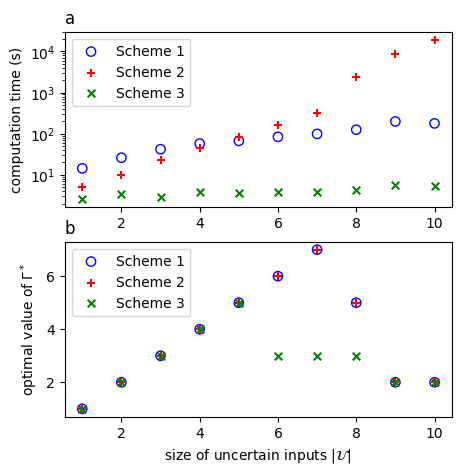

In [34]:
plt.figure(figsize = (5,5))
fontsize = 10
plt.subplot(211)
x = range(1,u_max - u_start )
plt.scatter(x, time_MILP, color = "none", marker = "o", edgecolors = "b", s = 45)
plt.scatter(x, time_orig, color = "r", marker = "+", s = 35)
plt.scatter(x, time_act, color = "g", marker  = "x", s = 30)
plt.yscale("log")
plt.ylabel("computation time (s)", fontsize = fontsize)
plt.legend(["Scheme 1","Scheme 2", "Scheme 3"])
plt.title("a", loc = "left")

plt.subplot(212)
x = range(1,u_max - u_start )
plt.scatter(x, gamma_MILP, color = "none", marker = "o", edgecolors = "b", s = 45)
plt.scatter(x, gamma_orig, color = "r", marker = "+", s = 35)
plt.scatter(x, gamma_act, color = "g", marker  = "x", s = 30)
plt.xlabel("size of uncertain inputs $|\mathcal{U}|$", fontsize = fontsize)
plt.ylabel("optimal value of $\Gamma^*$", fontsize = fontsize)
plt.legend(["Scheme 1","Scheme 2", "Scheme 3"])
plt.title("b", loc = "left")
plt.savefig("time_value.pdf", bbox_inches = "tight", pad_inches = 0.0)

In [33]:
# with open('data_time.npy', 'wb') as f:
#     np.save(f, time_MILP)
#     np.save(f, time_orig)
#     np.save(f, time_act)

In [14]:
with open('data_time.npy', 'rb') as f:
    time_MILP = np.load(f)
    time_orig = np.load(f)
    time_act = np.load(f)
    
time_MILP = np.append(time_MILP,_time_MILP)
time_orig = np.append(time_orig,_time_orig)
time_act = np.append(time_act,_time_act)

In [15]:
plt.scatter(x, time_MILP, color = "b")
plt.scatter(x, time_act, color = "g", marker  = "+")

NameError: name 'x' is not defined

In [7]:
## u_end starts from 23 to 31
time_orig = np.array([   5.63149428,   10.74408793,   21.28293586,   43.37191463,
         83.33352137,  167.16448545,  339.65614414, 2013.03402352, 6579.35539436])
time_act = np.array([4.22642827, 3.96351862, 3.98790932, 4.19291139, 4.40024686,
       4.41810966, 4.85330343, 4.90005136, 5.1797564 ])
time_MILP = np.array([ 19.16373563,  33.73477268,  53.04839754,  69.24800992,
        85.57148743, 109.24004769, 128.39018846, 161.39779687,
       163.95120049])

In [8]:
gamma_orig = [1,2,3,4,5,6,7,6,1]
gamma_MILP = [1,2,3,4,5,6,7,6,1]
gamma_act = [1,2,3,4,5,4,4,4,1]

In [9]:
sce_mat = GenScenario(rbar, u_start, u_end, _1)
scenario_mat_all = unique_rows(sce_mat)

NameError: name 'GenScenario' is not defined

In [11]:

def compute_envelop(list_sce_mat, M, L, eta, epsilon):
    state_mat = np.array([])
    for i in range(list_sce_mat.shape[0]):
        state = (Fx0.reshape(-1) + np.dot(Fr,list_sce_mat[i,:]) + np.dot(np.dot(Fu,M),list_sce_mat[i,u_start:u_end]) + np.dot(Fu,eta) + 
    np.dot(Fv,L)@list_sce_mat[i,u_start:u_end] + Fv@epsilon + FW)
        state_mat = np.append(state_mat, state)
            
    return state_mat.reshape(-1,len(state))
    


def compute_envelop_opt(sce_mat):
    state_mat = np.array([])
    I_ind = pyo.RangeSet(0,P.shape[0]-1)
    
    for s in range(sce_mat.shape[0]):
        
        m = pyo.ConcreteModel()
        m.u = pyo.Var(U_ind, domain = pyo.Reals)
        m.v = pyo.Var(V_ind, domain = pyo.Binary)
        m.x = pyo.Var(range(N+1),domain = pyo.Reals)
        
        m.init_cons = pyo.Constraint(expr = m.x[0] == x0)

        def state_cons(m,i):
            return (m.x[i+1] == A[0,0]*m.x[i]+ P_nom*B[0,0]*sce_mat[s,i] + B[0,0]*P_nom_recourse *m.v[i] + B[0,0]*m.u[i]
                    + R[0,0]*w_orig[i,0] + R[0,1]*w_orig[i,1])
        
        m.state_cons = pyo.Constraint(range(N),rule = state_cons)

        def cons1(m,i):
            return ( sum(O[i,j]*sce_mat[s,j] for j in range(N))+ sum(P[i,k]*m.u[k] for k in U_ind) + sum(Q[i,k]*m.v[k] 
                        for k in V_ind) <= h[i,0])
        m.cons = pyo.Constraint(I_ind, rule = cons1)
        
        def myOBJ(m):
            return sum((m.x[i] - 22)**2 for i in range(N))
        m.Obj = pyo.Objective(rule = myOBJ, sense = pyo.minimize)
        
        opt = pyo.SolverFactory('gurobi')
        
        results = opt.solve(m, tee = False)
        
        state = np.array([pyo.value(m.x[i]) for i in range(N+1)])
        state_mat = np.append(state_mat, state)
        
    return state_mat.reshape(-1, len(state))
    


In [29]:
# state_mat_p = compute_envelop(scenario_mat_all, M_p, L_p, eta_p, epsilon_p)
# state_mat_a = compute_envelop(scenario_mat_all, M_a, L_a, eta_a, epsilon_a)
# state_mat_orig = compute_envelop_opt(scenario_mat_all)

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [ ]:
state_upper_p = np.max(state_mat_p, axis = 0)
state_upper_p = np.append(np.array([x0]), state_upper_p)
state_lower_p = np.min(state_mat_p, axis = 0)
state_lower_p = np.append(np.array([x0]), state_lower_p)

state_upper_a = np.max(state_mat_a, axis = 0)
state_upper_a = np.append(np.array([x0]), state_upper_a)
state_lower_a = np.min(state_mat_a, axis = 0)
state_lower_a = np.append(np.array([x0]), state_lower_a)

state_upper_orig = np.max(state_mat_orig, axis = 0)
#state_upper_orig = np.append(np.array([x0]), state_upper_orig)
state_lower_orig = np.min(state_mat_orig, axis = 0)
#state_lower_orig = np.append(np.array([x0]), state_lower_orig)

x = np.linspace(0,24,49)
#x = np.array([i for i in range(0,)])
#x = np.linspace(0,len(state_upper_p)-1,len(state_upper_p)/2)
plt.figure(figsize = (6,3.5))
fontsize = 12

p1, = plt.plot(x, state_upper_p, color = "b", linewidth = 2)
plt.plot(x,state_lower_p, color = "b", linewidth = 2)
plt.fill_between(x ,state_upper_p, state_lower_p, color = "b", alpha = 0.2)

p2, = plt.plot(x, state_upper_a, color = "g", linestyle = "dotted",linewidth = 2.5)
plt.plot(x,state_lower_a, color = "g",linestyle = "dotted",linewidth = 2.5)
plt.fill_between(x ,state_upper_a, state_lower_a, color = "g", alpha = 0.1)

p3, = plt.plot(x, state_upper_orig, color = "r", linestyle = "dashed", linewidth = 1.5)
plt.plot(x,state_lower_orig, color = "r", linestyle = "--", linewidth = 1.5)
plt.fill_between(x ,state_upper_orig, state_lower_orig, color = "c", alpha = 0.1)

plt.legend([p1,p3,p2], ["Scheme 1", "Scheme 2", "Scheme 3"], loc = 2)

plt.xlabel("time (h)", fontsize = fontsize)
plt.ylabel("indoor temperature ($^\circ$C)", fontsize = fontsize)

upper_bound = T_high*np.ones(len(x))
lower_bound = T_low*np.ones(len(x))
p4 = plt.plot(x,upper_bound, "--", color="k")
p4 = plt.plot(x,lower_bound, "--", color = "k")

plt.savefig("temp.pdf", bbox_inches = "tight", pad_inches = 0.0)

In [ ]:
np.linspace(0,24,49)

In [ ]:
state_upper_a = np.max(state_mat_a, axis = 0)
state_lower_a = np.min(state_mat_a, axis = 0)

x = np.linspace(0,len(state_upper_a)-1,len(state_upper_a))

p1, = plt.plot(x, state_upper_a, color = "blue")
plt.plot(x,state_lower_a, color = "blue")
plt.fill_between(x ,state_upper_a, state_lower_a, color = "blue", alpha = 0.3)

In [ ]:
L_p